In [51]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [52]:
# Creating a function f(X) with a slope of -5
X = torch.arange(-5, 5, 0.1).view(-1, 1)
func = -5 * X

In [53]:
# Both in Pytorch and Tensorflow, the .numpy() method is pretty much straightforward. It converts a
# tensor object into an numpy.ndarray object. 
# This implicitly means that the converted tensor will be now processed on the CPU.

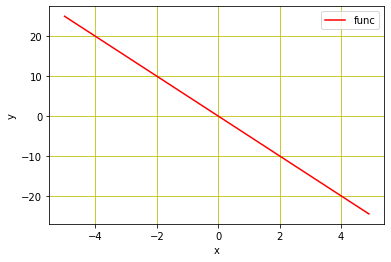

In [54]:
# Plot the line in red with grids
plt.plot(X.numpy(), func.numpy(), 'r', label='func')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid('True', color='y')
plt.show()

In [55]:
# Adding Gaussian noise to the function f(X) and saving it in Y
Y = func + 0.4 * torch.randn(X.size())

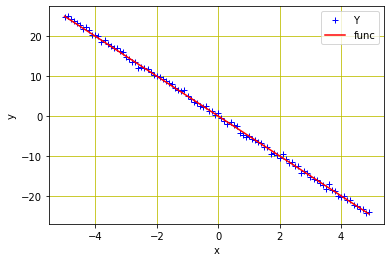

In [56]:
# Plot and visualizing the data points in blue
plt.plot(X.numpy(), Y.numpy(), 'b+', label='Y')
plt.plot(X.numpy(), func.numpy(), 'r', label='func')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid('True', color='y')
plt.show()

In [57]:
# defining the function for forward pass for prediction
def forward(x):
    return w * x

In [58]:
# evaluating data points with Mean Square Error.
def criterion(y_pred, y):
    return torch.mean((y_pred - y) ** 2)

In [59]:
# First, the parameter  need to be initialized randomly, for example, to the value .
w = torch.tensor(-10.0, requires_grad=True)

In [60]:
w

tensor(-10., requires_grad=True)

In [61]:
step_size = 0.1
loss_list = []
iter = 20

In [62]:
loss_list

[]

In [63]:
for i in range (iter):
    # making predictions with forward pass
    Y_pred = forward(X)
    # calculating the loss between original and predicted data points
    loss = criterion(Y_pred, Y)
    # storing the calculated loss in a list
    loss_list.append(loss.item())
    # backward pass for computing the gradients of the loss w.r.t to learnable parameters
    loss.backward()
    # updateing the parameters after each iteration
    w.data = w.data - step_size * w.grad.data
    # zeroing gradients after each iteration
    w.grad.data.zero_()
    # priting the values for understanding
    print('{},\t{},\t{}'.format(i, loss.item(), w.item()))

0,	206.54629516601562,	-1.705021858215332
1,	91.98319244384766,	-7.237771987915039
2,	41.01532745361328,	-3.5474281311035156
3,	18.340282440185547,	-6.00888729095459
4,	8.252418518066406,	-4.367094039916992
5,	3.764432907104492,	-5.462169647216797
6,	1.767777442932129,	-4.731754779815674
7,	0.8794882297515869,	-5.2189412117004395
8,	0.48429927229881287,	-4.893987655639648
9,	0.30848458409309387,	-5.110732078552246
10,	0.23026642203330994,	-4.966163158416748
11,	0.19546788930892944,	-5.062591075897217
12,	0.1799863874912262,	-4.9982733726501465
13,	0.17309869825839996,	-5.041173458099365
14,	0.17003445327281952,	-5.012558937072754
15,	0.16867117583751678,	-5.031644821166992
16,	0.1680646687746048,	-5.018914699554443
17,	0.16779479384422302,	-5.027405738830566
18,	0.16767476499080658,	-5.02174186706543
19,	0.16762138903141022,	-5.025519847869873


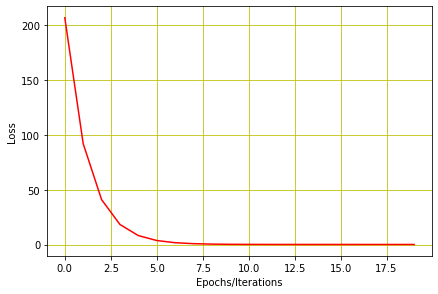

In [64]:
# Plotting the loss after each iteration
plt.plot(loss_list, 'r')
plt.tight_layout()
plt.grid('True', color='y')
plt.xlabel("Epochs/Iterations")
plt.ylabel("Loss")
plt.show()

In [65]:
loss

tensor(0.1676, grad_fn=<MeanBackward0>)

In [66]:
#training model for 2 parameters
# defining the function for forward pass for prediction
def forward(x):
    return w * x + b
w = torch.tensor(-10.0, requires_grad = True)
b = torch.tensor(-20.0, requires_grad = True)

In [67]:
step_size = 0.1
loss_list = []
iter = 20
 
for i in range (iter):    
    # making predictions with forward pass
    Y_pred = forward(X)
    # calculating the loss between original and predicted data points
    loss = criterion(Y_pred, Y)
    # storing the calculated loss in a list
    loss_list.append(loss.item())
    # backward pass for computing the gradients of the loss w.r.t to learnable parameters
    loss.backward()
    # updateing the parameters after each iteration
    w.data = w.data - step_size * w.grad.data
    b.data = b.data - step_size * b.grad.data
    # zeroing gradients after each iteration
    w.grad.data.zero_()
    b.grad.data.zero_()
    # priting the values for understanding
    print('{}, \t{}, \t{}, \t{}'.format(i, loss.item(), w.item(), b.item()))

0, 	597.7249755859375, 	-1.9050216674804688, 	-16.04410743713379
1, 	344.5756530761719, 	-7.264813423156738, 	-12.798442840576172
2, 	203.67514038085938, 	-3.6573758125305176, 	-10.255508422851562
3, 	122.89148712158203, 	-6.038106918334961, 	-8.185087203979492
4, 	75.36758422851562, 	-4.429455280303955, 	-6.552557468414307
5, 	46.80997085571289, 	-5.486100673675537, 	-5.230447292327881
6, 	29.35892105102539, 	-4.768096923828125, 	-4.183325290679932
7, 	18.557201385498047, 	-5.236534118652344, 	-3.3384478092193604
8, 	11.807060241699219, 	-4.915637969970703, 	-2.6672301292419434
9, 	7.559274196624756, 	-5.1229634284973145, 	-2.127047061920166
10, 	4.8727240562438965, 	-4.979275703430176, 	-1.6969740390777588
11, 	3.1675026416778564, 	-5.070814609527588, 	-1.3514785766601562
12, 	2.0824103355407715, 	-5.006303310394287, 	-1.0759977102279663
13, 	1.3906967639923096, 	-5.046577453613281, 	-0.8549678325653076
14, 	0.9491979479789734, 	-5.0175042152404785, 	-0.6785467267036438
15, 	0.667158

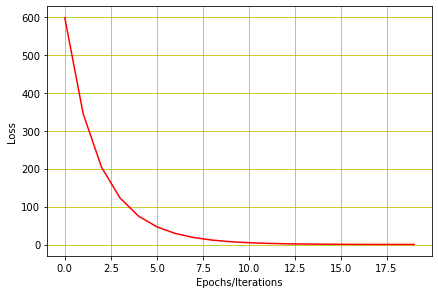

In [68]:
# Plotting the loss after each iteration
plt.plot(loss_list, 'r')
plt.tight_layout()
plt.grid('True', color='y')
plt.xlabel("Epochs/Iterations")
plt.ylabel("Loss")
plt.show()

In [69]:
# Summary
# In this tutorial you learned how you can build and train a simple linear regression model in PyTorch. Particularly, you learned.

# How you can build a simple linear regression model from scratch in PyTorch.
# How you can apply a simple linear regression model on a dataset.
# How a simple linear regression model can be trained on a single learnable parameter.
# How a simple linear regression model can be trained on two learnable parameters.